# Week 7 Assignment: Data Analysis
This notebook demonstrates **data loading, analysis, and visualization** using Pandas and Matplotlib.


# Task 1: Load and Explore Dataset

In this step, we will:
- Load the Iris dataset using scikit-learn.
- Convert it into a pandas DataFrame.
- Inspect the first few rows.
- Explore the structure, data types, and missing values.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Ensure plots appear inline
%matplotlib inline

In [2]:
# Load Iris dataset
iris = load_iris()

# Convert to pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the species column
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The output displays the first 5 rows of the Iris dataset:
- Columns: 4 numerical features (sepal length, sepal width, petal length, petal width) and 1 categorical feature (species).
- Each row represents a single flower measurement.
- Species values are 'setosa', 'versicolor', or 'virginica'.


In [3]:
# Check the structure and data types
df.info()

# Basic statistics of numerical columns
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

- The dataset has 150 rows and 5 columns.
- All numerical columns are float type, and the 'species' column is categorical.
- No missing values are present, so the dataset is ready for analysis.


# Task 2: Basic Data Analysis

In this step, we will:
- Compute summary statistics for numerical columns.
- Group the data by species and calculate the mean of each feature.
- Identify interesting patterns in the dataset.


In [4]:
# Compute summary statistics for all numerical columns
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The summary statistics show:
- `count`: Number of observations (150 for all numerical columns)
- `mean`: Average value of each numerical feature
- `std`: Standard deviation, indicating spread
- `min` and `max`: Range of values
- `25%`, `50%`, `75%`: Quartiles
This helps us understand the overall distribution of measurements in the dataset.


In [6]:
# Group the data by species and compute the mean of each numerical column
species_group = df.groupby('species', observed=False).mean()
species_group



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Grouping by species allows us to compare the average measurements of each species:
- Setosa tends to have the smallest petals and sepals.
- Virginica tends to have the largest petals and sepals.
- Versicolor is intermediate in all features.


In [15]:
# Species with the largest average petal length
species_group['petal length (cm)'].sort_values(ascending=False)


species
virginica     5.552
versicolor    4.260
setosa        1.462
Name: petal length (cm), dtype: float64

Observation:
- Virginica has the largest average petal length, followed by Versicolor, then Setosa.
- This pattern is consistent across other features like petal width and sepal length.


# Task 3: Data Visualization

In this step, we will create different plots to visualize the Iris dataset:
1. Line chart to show trends.
2. Bar chart to compare average measurements across species.
3. Histogram to understand the distribution of a numerical column.
4. Scatter plot to visualize relationships between numerical columns.

Plots will include titles, axis labels, and legends where necessary.


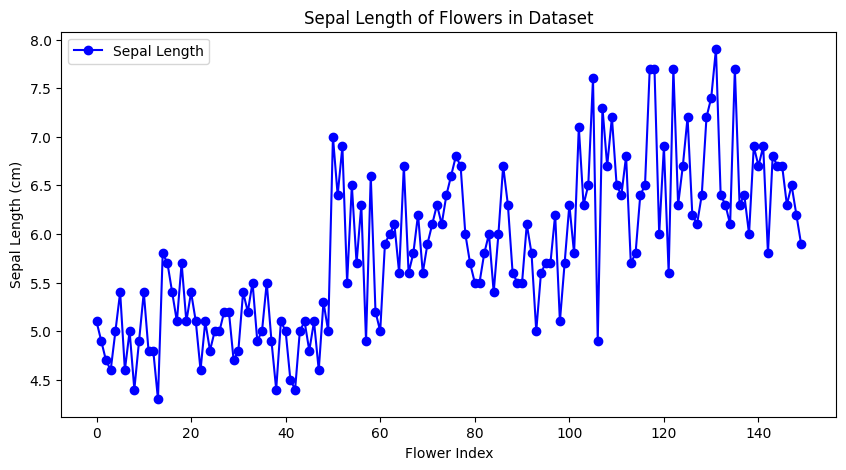

In [16]:
# Line plot of sepal length for all flowers
plt.figure(figsize=(10,5))
plt.plot(df.index, df['sepal length (cm)'], marker='o', linestyle='-', color='blue', label='Sepal Length')
plt.xlabel('Flower Index')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length of Flowers in Dataset')
plt.legend()
plt.show()


- The line chart shows the trend of sepal length across all flowers in the dataset.
- X-axis: flower index (0 to 149)
- Y-axis: sepal length in cm
- This helps visualize how measurements vary across the dataset.


In [7]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


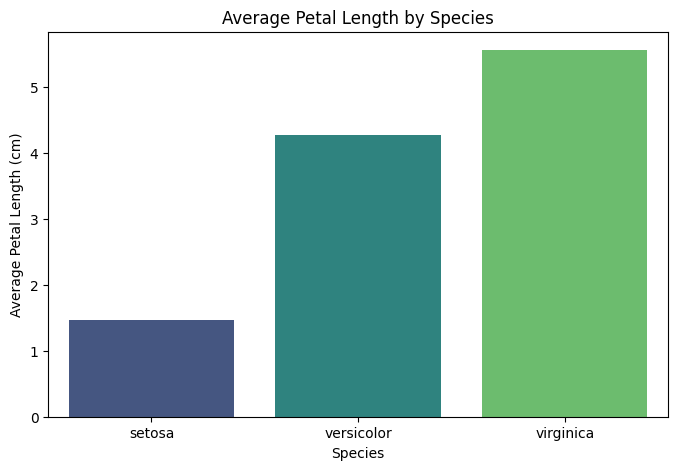

In [8]:
# Bar chart of average petal length by species
plt.figure(figsize=(8,5))
sns.barplot(x=species_group.index, y=species_group['petal length (cm)'], palette='viridis')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.title('Average Petal Length by Species')
plt.show()


- The bar chart compares the average petal length of each species.
- Virginica has the largest petals, Setosa the smallest, Versicolor is intermediate.
- This visualization clearly shows differences between species.


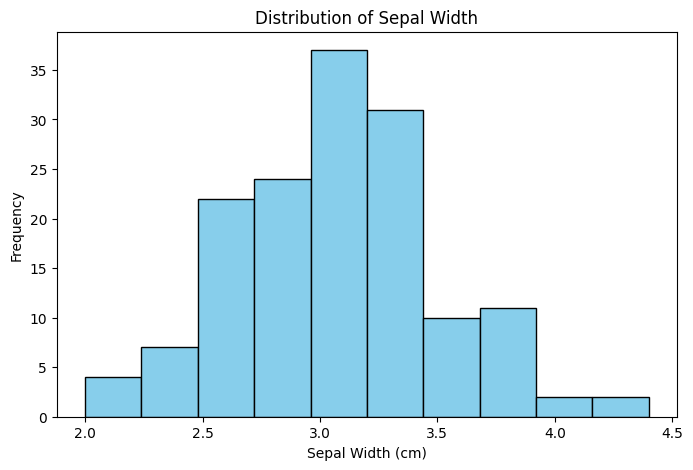

In [18]:
# Histogram of sepal width
plt.figure(figsize=(8,5))
plt.hist(df['sepal width (cm)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Width')
plt.show()


- The histogram shows the distribution of sepal width across all flowers.
- Most flowers have sepal widths between 2.8 cm and 3.4 cm.
- Helps understand how values are spread and detect clusters.


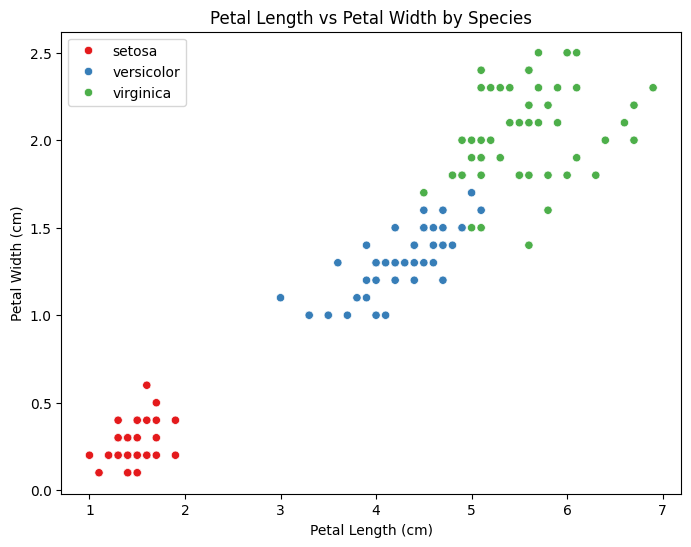

In [19]:
# Scatter plot of petal length vs petal width, colored by species
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='Set1')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width by Species')
plt.legend()
plt.show()


- The scatter plot visualizes the relationship between petal length and petal width.
- Different species are colored differently.
- Observations:
  - Setosa forms a distinct cluster with smaller petals.
  - Versicolor and Virginica have larger petals, but Virginica tends to be larger overall.


# Step 4: Summary of Findings

After analyzing and visualizing the Iris dataset, we can conclude the following:

1. **Dataset Overview**
   - The dataset contains 150 flowers, each with 4 numerical features (sepal length, sepal width, petal length, petal width) and 1 categorical feature (species).
   - There are no missing values, and the data types are appropriate for analysis.

2. **Basic Data Analysis**
   - Summary statistics show that Virginica generally has the largest measurements, Setosa the smallest, and Versicolor is intermediate.
   - Grouping by species confirms this pattern across all numerical features.
   - The largest average petal length is observed in Virginica, smallest in Setosa.

3. **Visual Insights**
   - **Line Chart:** Sepal length varies across flowers, showing trends and clusters.
   - **Bar Chart:** Clear differences in average petal length among species.
   - **Histogram:** Sepal width is concentrated between 2.8 cm and 3.4 cm.
   - **Scatter Plot:** Petal length and width strongly correlate and visually separate species clusters.

4. **Key Observations**
   - Setosa is easily distinguishable from other species based on petal measurements.
   - Virginica has consistently larger features than Versicolor and Setosa.
   - Petal length and width are good features for differentiating species.

Overall, the Iris dataset demonstrates clear patterns among species, and visualizations effectively highlight these differences.
